In [20]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.preprocessing import image
import numpy as np
from tensorflow.python.keras import utils
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.applications import VGG16
from keras.preprocessing.image import img_to_array
from scipy.misc import toimage


Using TensorFlow backend.


In [3]:
img_width, img_height = 256, 256
input_shape = (img_width, img_height, 3)
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)

# Размер мини-выборки
batch_size = 16
# Количество изображений для тестирования
nb_test_samples = 305 #3750//?

In [5]:
test_dir = 'test'
print("Загружаю сеть из файлов")
# Загружаем данные об архитектуре сети
json_file = open("mnist_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель
loaded_model = model_from_json(loaded_model_json)
# Загружаем сохраненные веса в модель
loaded_model.load_weights("mnist_model.h5")
print("Загрузка сети завершена")

# Компилируем загруженную модель
loaded_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Оцениваем качество обучения сети загруженной сети на тестовых данных
scores = loaded_model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Точность работы загруженной сети на тестовых данных: %.2f%%" % (scores[1]*100))




Загружаю сеть из файлов
Загрузка сети завершена
Found 1525 images belonging to 5 classes.
Точность работы загруженной сети на тестовых данных: 71.38%


In [6]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
vgg16_net.trainable = False
vgg16_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [7]:
activation_model = Model(inputs=vgg16_net.input, outputs=vgg16_net.layers[16].output)
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

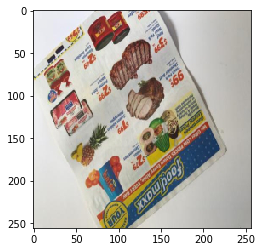

In [8]:
image_file_name = './test/paper/paper1706.jpg'
img = image.load_img(image_file_name)
plt.imshow(img)

In [9]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

In [10]:
activation = activation_model.predict(img_array)

In [11]:
print(activation.shape)

(1, 16, 16, 512)


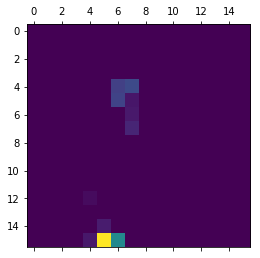

In [12]:
plt.matshow(activation[0,:, :, 511], cmap='viridis')

In [13]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row

In [14]:
display_grid = np.zeros((n_cols * size, images_per_row * size))

In [15]:
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


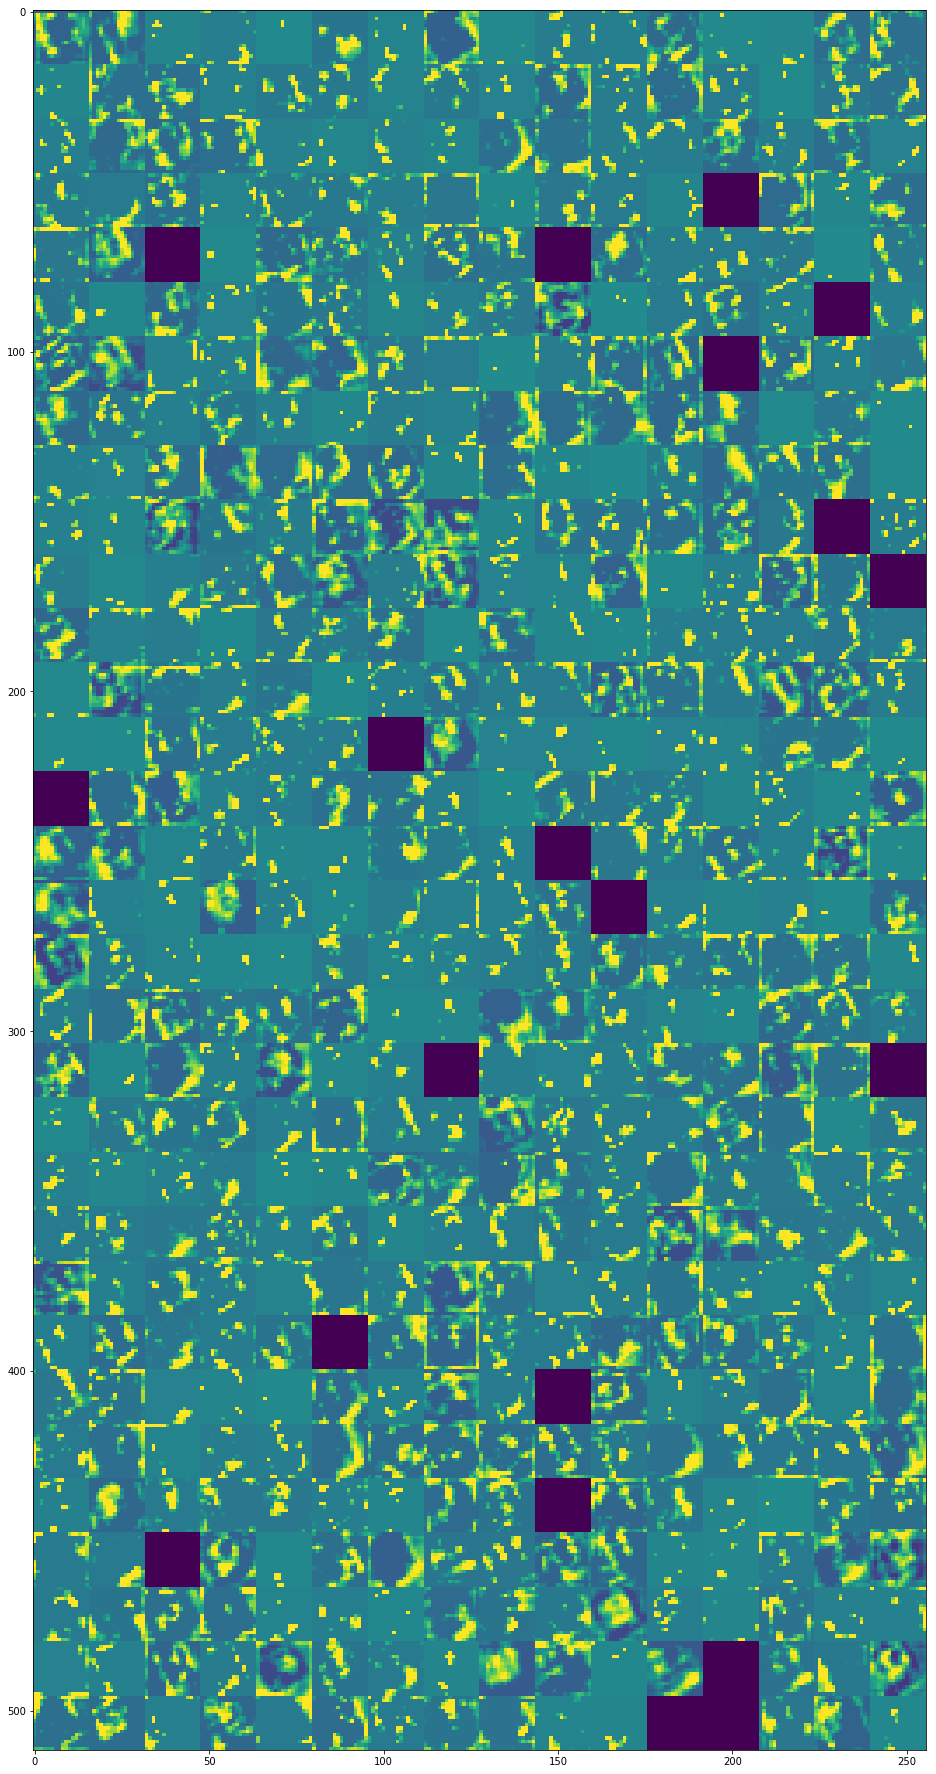

In [16]:
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

image batch size (1, 256, 256, 3)


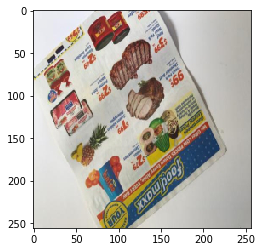

In [22]:
numpy_image = img_to_array(img)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))


In [25]:

processed_image = loaded_model.preprocess_input(image_batch.copy())
 


AttributeError: 'Sequential' object has no attribute 'preprocess_input'